In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

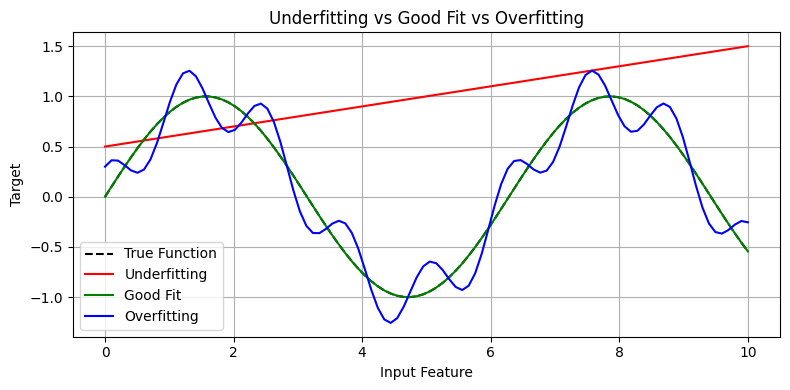

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Slide 2: Underfitting vs Overfitting
x = np.linspace(0, 10, 100)
y_true = np.sin(x)

# Simulate fits
underfit = 0.1 * x + 0.5
good_fit = np.sin(x)
overfit = np.sin(x) + 0.3 * np.cos(5 * x)

plt.figure(figsize=(8, 4))
plt.plot(x, y_true, 'k--', label='True Function')
plt.plot(x, underfit, 'r-', label='Underfitting')
plt.plot(x, good_fit, 'g-', label='Good Fit')
plt.plot(x, overfit, 'b-', label='Overfitting')
plt.legend()
plt.title('Underfitting vs Good Fit vs Overfitting')
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Generate a synthetic binary classification dataset
X, y = make_classification(
    n_samples=500,
    n_features=10,
    n_informative=5,
    n_redundant=5,
    n_repeated=0,
    n_classes=2,
    flip_y=0.1,
    class_sep=1.0,
    random_state=42
)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define models with different regularization techniques
models = {
    'L1 (Lasso)': LogisticRegression(penalty='l1', solver='liblinear', C=0.1, max_iter=100),
    'L2 (Ridge)': LogisticRegression(penalty='l2', solver='liblinear', C=0.1, max_iter=100),
    'No Regularization': LogisticRegression(penalty=None, solver='lbfgs', max_iter=100)
}

In [ ]:
coefficients = {}
train_accuracies = {}
test_accuracies = {}

In [ ]:
# Train models and collect coefficients and accuracies
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    coefficients[name] = model.coef_[0]
    train_accuracies[name] = train_acc
    test_accuracies[name] = test_acc

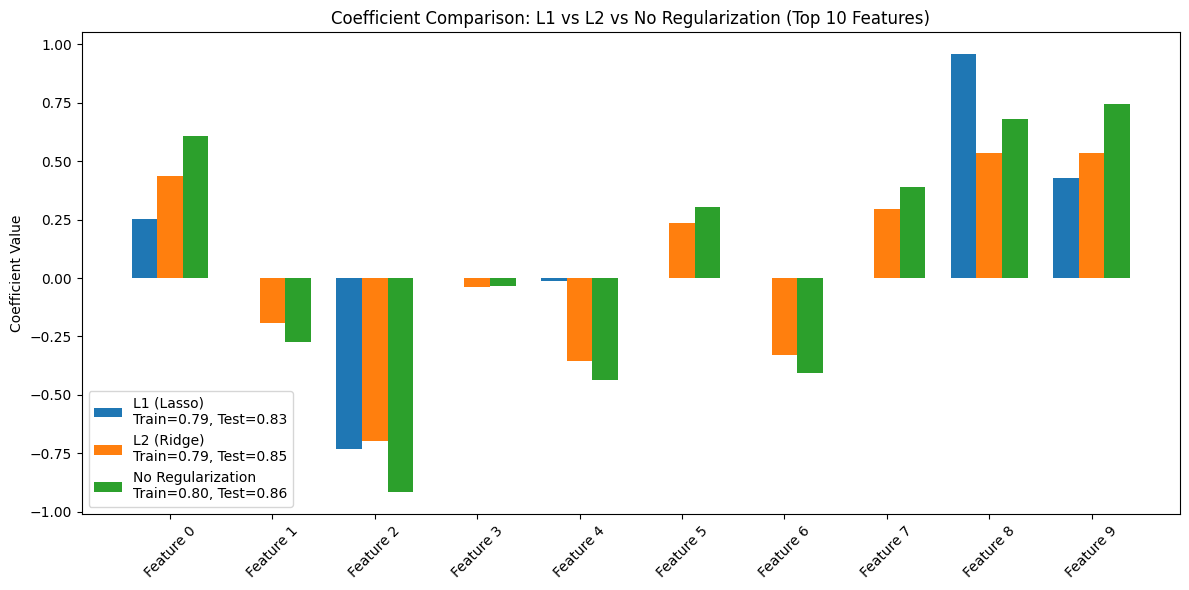

In [ ]:
# Plotting coefficient magnitudes
labels = [f'Feature {i}' for i in range(10)]  # Only show first 10 features for clarity
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
for i, (name, coef) in enumerate(coefficients.items()):
    ax.bar(x + i * width, coef[:10], width, label=f'{name}\nTrain={train_accuracies[name]:.2f}, Test={test_accuracies[name]:.2f}')

ax.set_xticks(x + width)
ax.set_xticklabels(labels, rotation=45)
ax.set_ylabel('Coefficient Value')
ax.set_title('Coefficient Comparison: L1 vs L2 vs No Regularization (Top 10 Features)')
ax.legend()
plt.tight_layout()
plt.show()

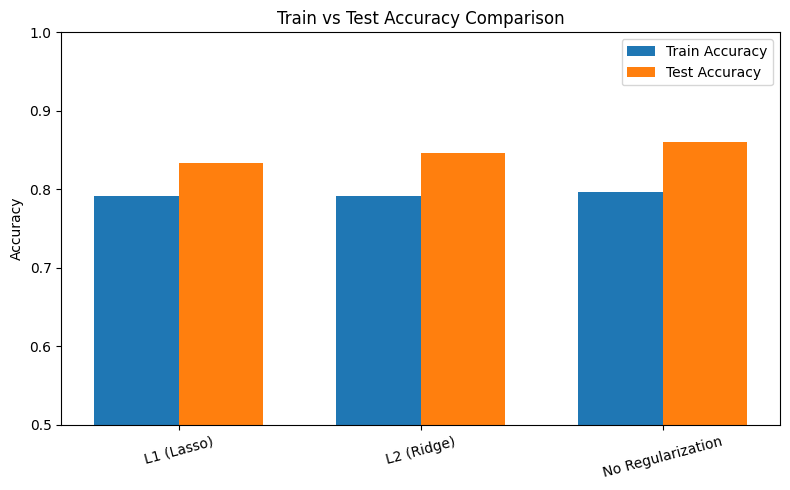

In [ ]:
# Plotting train vs test accuracy for all models
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.35
bar_x = np.arange(len(models))

train_vals = list(train_accuracies.values())
test_vals = list(test_accuracies.values())
labels = list(models.keys())

ax.bar(bar_x, train_vals, bar_width, label='Train Accuracy')
ax.bar(bar_x + bar_width, test_vals, bar_width, label='Test Accuracy')

ax.set_xticks(bar_x + bar_width / 2)
ax.set_xticklabels(labels, rotation=15)
ax.set_ylim(0.5, 1.0)
ax.set_ylabel('Accuracy')
ax.set_title('Train vs Test Accuracy Comparison')
ax.legend()
plt.tight_layout()
plt.show()h